In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [95]:
df = pd.read_excel("C:/Yangi jild/Data_science_praktikum/MAchine_Learning_Cali/Toshkent_Bashorat/uybor.xlsx")
df.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [96]:
# ustunlardagi ortiqcha so'zlarni yani belgilarni olib tashlash
df["size"] = pd.to_numeric(df["size"], errors="coerce", downcast='integer')
df["price"] = pd.to_numeric(df["price"], errors="coerce", downcast='integer')

In [97]:
df["size"] = df["size"].astype('int64')
df["size"] = df["size"].ffill()

In [98]:
df.price.describe()

count      7421.000000
mean      59117.618919
std       46701.090308
min       10500.000000
25%       35000.000000
50%       46500.000000
75%       66847.000000
max      800000.000000
Name: price, dtype: float64

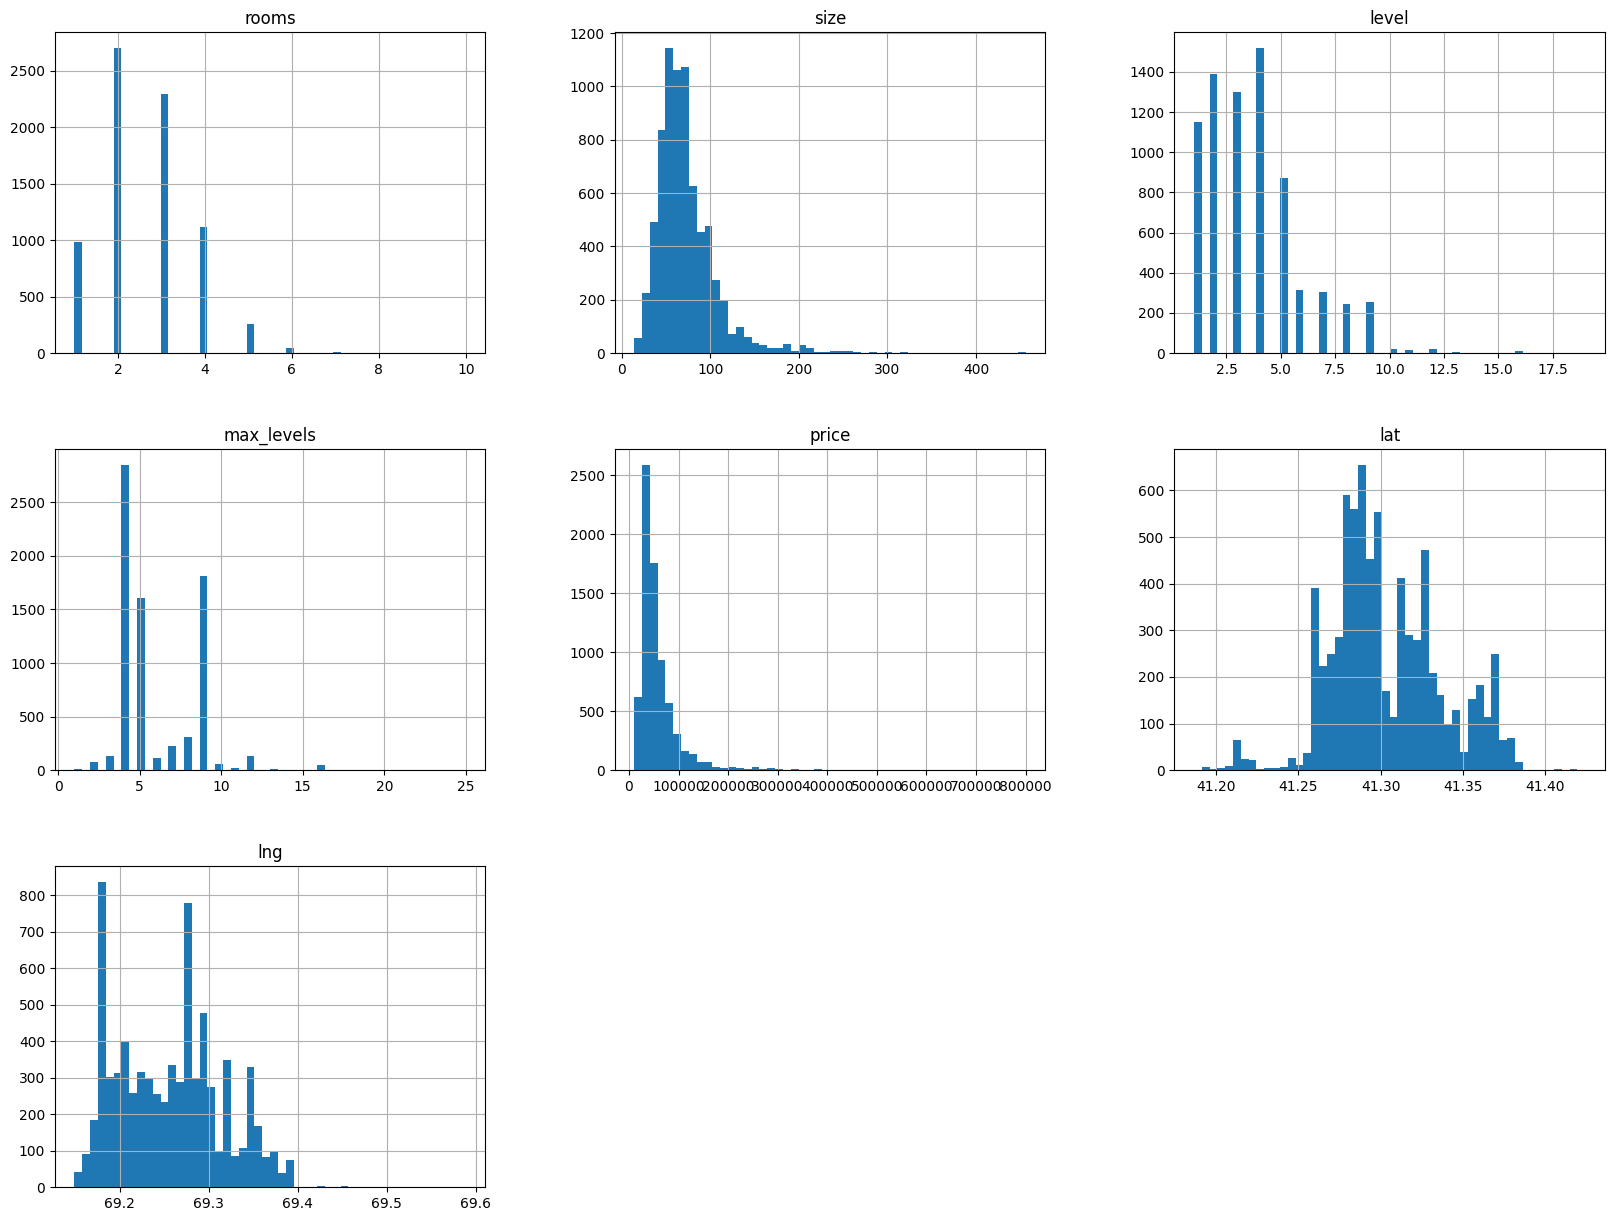

In [99]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
train_toplam, test_toplam = train_test_split(df, test_size=0.2, random_state=14)
train_set = train_toplam.copy()

In [101]:
x = train_set.drop(["price", "address"], axis=1)
x_labels = train_set["price"].copy()
x_num = train_set.drop(["address", "district", "price"], axis=1)

In [102]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()

onehot = category_encoder.fit_transform(x[["district"]])
onehot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
onehot_df = pd.get_dummies(x["district"])
onehot_df

,Bektemir,Chilonzor,Mirobod,Mirzo Ulugbek,Olmzor,Sergeli,Shayhontohur,Uchtepa,Yakkasaroy,Yangihayot,Yashnobod,Yunusobod
55,False,False,False,False,False,False,False,True,False,False,False,False
1155,False,True,False,False,False,False,False,False,False,False,False,False
3810,False,False,False,True,False,False,False,False,False,False,False,False
4318,False,True,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6471,False,True,False,False,False,False,False,False,False,False,False,False
2454,False,False,False,False,False,False,True,False,False,False,False,False
1292,False,False,False,False,False,False,False,False,False,False,False,True
5464,False,True,False,False,False,False,False,False,False,False,False,False


In [104]:
from sklearn.base import BaseEstimator, TransformerMixin

# df jadvalidan kerakli ustunlarni indexini olish
rooms_ix, size_ix = 1,2

class Combination_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, ortacha_xona_olchami = True):
        self.ortacha_xona_olchami = ortacha_xona_olchami
    
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer
    
    def transform(self, X):
        ortacha_olcham = X[:, size_ix] / X[:, rooms_ix]
        if self.ortacha_xona_olchami:
            return np.c_[X, ortacha_olcham]

In [105]:
attribut_adder = Combination_Transformer()
x_combination = attribut_adder.transform(x.values)

In [106]:
x_combination[0,:]

array(['Uchtepa', 4, 80, 4, 5, 41.2797359, 69.1670599, 20.0], dtype=object)

In [107]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(x_num)

array([[ 1.2786414 ,  0.1845365 ,  0.13907402, -0.39635232, -0.71115064,
        -1.51909725],
       [-0.57506854, -0.70654457,  0.13907402, -0.78097671, -0.423826  ,
        -0.86492757],
       [-1.50192351, -1.32760108, -1.19819924, -0.78097671,  0.46989594,
         0.70185021],
       ...,
       [ 2.20549636,  0.9946102 ,  2.36786278,  1.14214524,  1.82371681,
         0.34271744],
       [-0.57506854, -0.89556177,  0.13907402, -0.78097671, -0.53775768,
        -0.56300999],
       [-0.57506854, -0.43652001,  0.13907402, -0.39635232, -0.71115064,
        -1.51909725]])

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

raqam_pipline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("add_atributes", Combination_Transformer()),
    ("std_scaler", StandardScaler())
])
raqam_pipline.fit_transform(x_num)

array([[ 1.2786414 ,  0.1845365 ,  0.13907402, ..., -0.71115064,
        -1.51909725, -0.1849678 ],
       [-0.57506854, -0.70654457,  0.13907402, ..., -0.423826  ,
        -0.86492757,  0.75070483],
       [-1.50192351, -1.32760108, -1.19819924, ...,  0.46989594,
         0.70185021, -0.40707191],
       ...,
       [ 2.20549636,  0.9946102 ,  2.36786278, ...,  1.82371681,
         0.34271744,  0.66306607],
       [-0.57506854, -0.89556177,  0.13907402, ..., -0.53775768,
        -0.56300999,  1.14765685],
       [-0.57506854, -0.43652001,  0.13907402, ..., -0.71115064,
        -1.51909725,  0.35275794]])

In [109]:
from sklearn.compose import ColumnTransformer

num_attributes = list(x_num)
matn_attributes = ["address", "district"]
x_full = train_set.drop(["price"], axis=1)
full_pipline = ColumnTransformer([
    ("num", raqam_pipline, num_attributes),
    ("matn", OrdinalEncoder(), matn_attributes)
])

x_prepared = full_pipline.fit_transform(x_full)
x_prepared[0:3,:]

array([[ 1.27864140e+00,  1.84536500e-01,  1.39074016e-01,
        -3.96352324e-01, -7.11150642e-01, -1.51909725e+00,
        -1.84967804e-01,  8.82000000e+02,  7.00000000e+00],
       [-5.75068539e-01, -7.06544574e-01,  1.39074016e-01,
        -7.80976714e-01, -4.23825998e-01, -8.64927570e-01,
         7.50704828e-01,  1.34000000e+02,  1.00000000e+00],
       [-1.50192351e+00, -1.32760108e+00, -1.19819924e+00,
        -7.80976714e-01,  4.69895942e-01,  7.01850214e-01,
        -4.07071914e-01,  3.52000000e+02,  3.00000000e+00]])

In [110]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(x_prepared, x_labels)

LinearRegression()

In [111]:
test_data = x_full.sample(10)
test_label = x_labels.loc[test_data.index]

test_data_prepared = full_pipline.transform(test_data)

In [112]:
bashorat_labels = LR_model.predict(test_data_prepared)
bashorat_labels

array([ 39963.4875015 , 113696.51089477,  29966.74157175,  30400.14699022,
        57063.92264993,  37600.59762356,  45345.7194241 ,  63266.85653667,
        32476.37079434, 181927.39651125])

In [113]:
pd.DataFrame({"Asl qiymat":test_label, "Bashorat":bashorat_labels})

,Asl qiymat,Bashorat
4317,30500,39963.487502
2007,141922,113696.510895
3254,25500,29966.741572
3998,33500,30400.146990
3056,68000,57063.922650
2724,35000,37600.597624
4635,46000,45345.719424
4438,53500,63266.856537
3322,28000,32476.370794
3670,335000,181927.396511


In [114]:
x_test = test_toplam.drop(["price"], axis=1)
y_test = test_toplam["price"].copy()

x_test_prepared = full_pipline.fit_transform(x_test)
y_LR_model = LR_model.predict(x_test_prepared)
y_LR_model

array([144835.2449163 ,  49827.47537985,  28791.02199816, ...,
       103037.14070157,  44970.36139959,  61666.17423701])

In [115]:
# y_test jadvalidan NaN qiymatlarni o'rniga boshqa qiymatlar qo'yish
y_test = y_test.ffill()
y_test = y_test.astype('int64')

In [116]:
# MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_LR_model)
print("MAE = ", MAE)

RMSE = mean_squared_error(y_test, y_LR_model)
print("RMSE = ", np.sqrt(RMSE))

MAE =  16634.417604527556
RMSE =  27405.592424293834


In [117]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_prepared, x_labels)

RandomForestRegressor()

In [118]:
y_RF_model = RF_model.predict(x_test_prepared)
MAE_RF = mean_absolute_error(y_test, y_RF_model)
RMSE_RF = mean_squared_error(y_test, y_RF_model)
print("MAE_RF = ", MAE_RF)
print("RMSE_RF = ", np.sqrt(RMSE_RF))

MAE_RF =  11987.647439540327
RMSE_RF =  23514.52281749945


In [119]:
df2 = df.copy()
df2 = df2.ffill()

In [120]:
num_attributes1 = list(x_num)
matn_attributes1 = ["district"]

full_pipline1 = ColumnTransformer([
    ("num", raqam_pipline, num_attributes1),
    ("matn", OrdinalEncoder(), matn_attributes1)
])

x_prepared = full_pipline1.fit_transform(x_full)
x_prepared[0:3,:]

array([[ 1.2786414 ,  0.1845365 ,  0.13907402, -0.39635232, -0.71115064,
        -1.51909725, -0.1849678 ,  7.        ],
       [-0.57506854, -0.70654457,  0.13907402, -0.78097671, -0.423826  ,
        -0.86492757,  0.75070483,  1.        ],
       [-1.50192351, -1.32760108, -1.19819924, -0.78097671,  0.46989594,
         0.70185021, -0.40707191,  3.        ]])

In [121]:
x_df2 = df2.drop(["price", "address"], axis=1)
y_df2 = df2["price"].copy()

x_df2_prepared = full_pipline1.transform(x_df2)

In [122]:
from sklearn.model_selection import cross_val_score

RMSE_Cross = cross_val_score(RF_model, x_df2_prepared, y_df2, scoring="neg_mean_squared_error", cv=6)

In [123]:
def RMSE_Cross_def(cross):
    print("Cross -> ", cross)
    print("Mean  -> ", cross.mean())
    print("Std.dev -> ", cross.std())

In [124]:
RMSE_Cross_def(np.sqrt(-RMSE_Cross))

Cross ->  [15234.05594997 26640.43305679 22996.10563491 25780.96272216
 21820.16182085 18567.23289504]
Mean  ->  21839.82534662027
Std.dev ->  3963.6224936939716


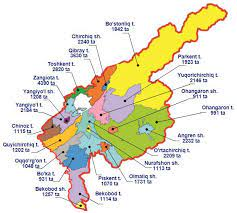

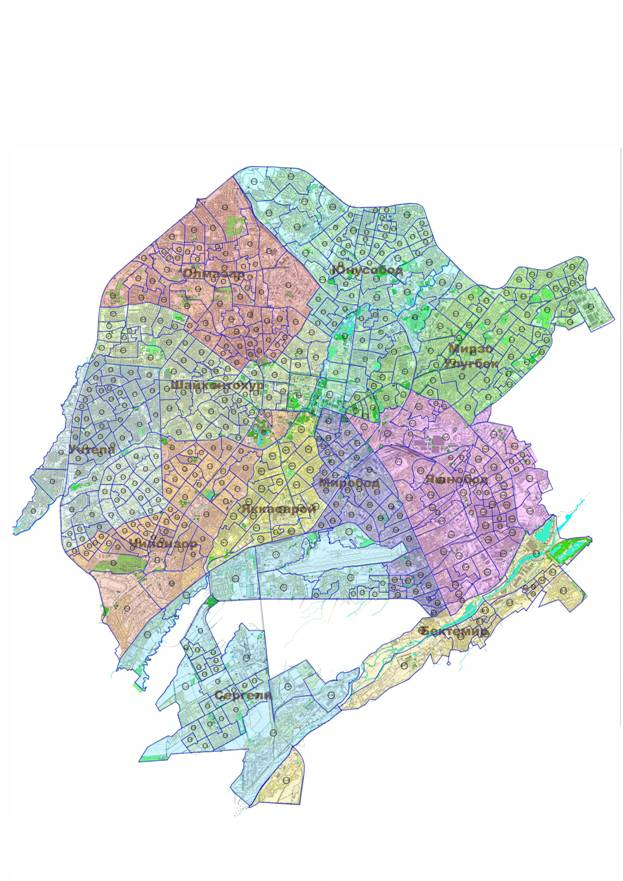

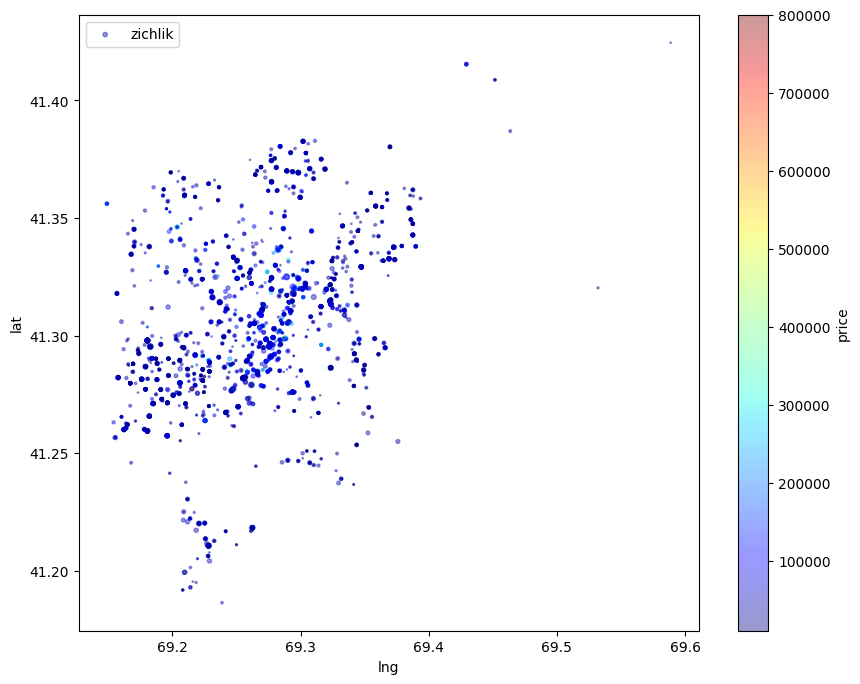

In [125]:
df.plot(
    kind="scatter",
    x="lng",
    y="lat",
    alpha=0.4,
    s=df["level"],
    label="zichlik",
    c="price",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()